In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['font.size'] = 12
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
from scipy.stats import nbinom
import numpy as np
from matplotlib import pyplot as plt

In [3]:
%%latex
$$X\sim NB(3,0.25)$$
$$Y\sim NB(6,0.5)$$
$$E(X)=E(Y)$$
$$V(X)>V(Y)$$

<IPython.core.display.Latex object>

In [4]:
r = 3
p = 0.25
m = 2
mean_X, var_X = nbinom.stats(r,p,loc=r)
mean_Y, var_Y = nbinom.stats(r*m,p*m,loc=m*r)
print(mean_X, mean_Y)
print(var_X, var_Y)

12.0 12.0
36.0 12.0


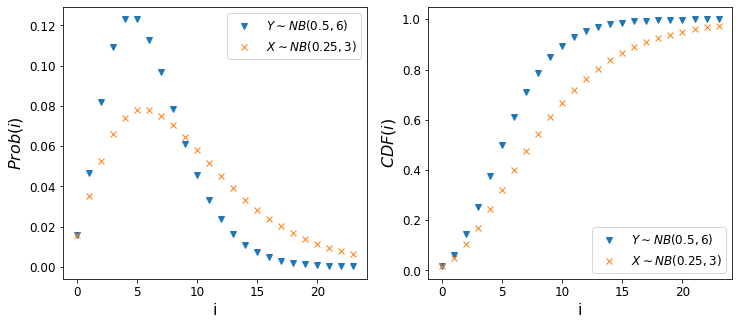

In [5]:
# Wrong behaviour
X = nbinom(r,p)
Y = nbinom(r*m,p*m)

i = range(0,int(np.round(2*r/p,0)))

p_X_i = X.pmf([xx for xx in i])
p_Y_i = Y.pmf([xx for xx in i])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(i,p_Y_i,'v',label="$Y\sim NB({{{0}}},{{{1}}})$".format(p*m,r*m))
plt.plot(i,p_X_i,'x',label="$X\sim NB({{{0}}},{{{1}}})$".format(p,r))
plt.xlabel("i",fontsize=16)
plt.ylabel('$Prob(i)$',fontsize=16)
plt.legend()

f_X_i = X.cdf([xx for xx in i])
f_Y_i = Y.cdf([xx for xx in i])

plt.subplot(1,2,2)
plt.plot(i,f_Y_i,'v',label="$Y\sim NB({{{0}}},{{{1}}})$".format(p*m,r*m))
plt.plot(i,f_X_i,'x',label="$X\sim NB({{{0}}},{{{1}}})$".format(p,r))
plt.xlabel("i",fontsize=16)
plt.ylabel('$CDF(i)$',fontsize=16)
plt.legend()

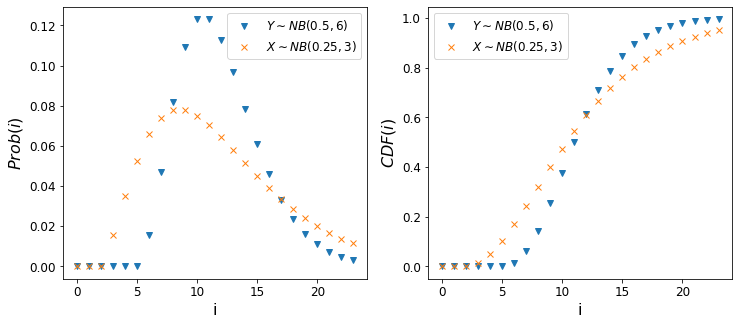

In [6]:
# Correct behaviour
X = nbinom(r,p,loc=r)
Y = nbinom(r*m,p*m,loc=m*r)

i = range(0,int(np.round(2*r/p,0)))

p_X_i = X.pmf([xx for xx in i])
p_Y_i = Y.pmf([xx for xx in i])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(i,p_Y_i,'v',label="$Y\sim NB({{{0}}},{{{1}}})$".format(p*m,r*m))
plt.plot(i,p_X_i,'x',label="$X\sim NB({{{0}}},{{{1}}})$".format(p,r))
plt.xlabel("i",fontsize=16)
plt.ylabel('$Prob(i)$',fontsize=16)
plt.legend()

f_X_i = X.cdf([xx for xx in i])
f_Y_i = Y.cdf([xx for xx in i])

plt.subplot(1,2,2)
plt.plot(i,f_Y_i,'v',label="$Y\sim NB({{{0}}},{{{1}}})$".format(p*m,r*m))
plt.plot(i,f_X_i,'x',label="$X\sim NB({{{0}}},{{{1}}})$".format(p,r))
plt.xlabel("i",fontsize=16)
plt.ylabel('$CDF(i)$',fontsize=16)
plt.legend()

In [7]:
%%latex
Calculate $P(X\leq 8)$ and $P(Y\leq 8)$
$$$$
Calculate $P(X\leq 20)$ and $P(Y\leq 20)$

<IPython.core.display.Latex object>

In [8]:
v1 = 8
v2 = 20
f_X_v1 = X.cdf(v1)
f_Y_v1 = Y.cdf(v1)
f_X_v2 = X.cdf(v2)
f_Y_v2 = Y.cdf(v2)

print('P(X <= {}) = {:.2f}'.format(v1,f_X_v1))
print('P(Y <= {}) = {:.2f}'.format(v1,f_Y_v1))
print('X wins' if f_X_v1 > f_Y_v1 else 'Y wins','on {} trial'.format(v1))

print('P(X <= {}) = {:.2f}'.format(v2,f_X_v2))
print('P(Y <= {}) = {:.2f}'.format(v2,f_Y_v2))
print('X wins' if f_X_v2 > f_Y_v2 else 'Y wins','on {} trial'.format(v2))


P(X <= 8) = 0.32
P(Y <= 8) = 0.14
X wins on 8 trial
P(X <= 20) = 0.91
P(Y <= 20) = 0.98
Y wins on 20 trial


In [9]:
%%latex
Calculate $P(X>Y)$

$$$$
Upper Bound:
$$P(X>Y)=1-P(Y\geq X)=1-\sum_{x=k}^{\inf}{P(X=x)P(Y\geq x)}\leq$$ 
$$1-\sum_{x=k}^{R}{P(X=x)P(Y\geq x)}=1-\sum_{x=k}^{R}{P(X=x)(1-P(Y<x))}=1-\sum_{x=k}^{R}{P(X=x)(1-CDF_{Y}(x-1))}$$

$$$$
Lower Bound:
$$P(X>Y)=\sum_{y=m\cdot k}^{\inf}{P(Y=y)P(X>y)}\geq$$
$$\sum_{y=m\cdot k}^{R}{P(Y=y)P(X>y)}=\sum_{y=m\cdot k}^{R}{P(Y=y)(1-CDF_{X}(y))}$$


<IPython.core.display.Latex object>

In [10]:
R = range(r,int(m*r/p))
lower = [sum(Y.pmf(y)*(1-X.cdf(y)) for y in range(r*m,i)) for i in R]
upper = [1-sum(X.pmf(x)*(1-Y.cdf(x-1)) for x in range(r,i)) for i in R]

In [11]:
R

range(3, 24)

Text(28, 0.5, '$P(X>Y)\\in[{0.4246},{0.4251}]$')

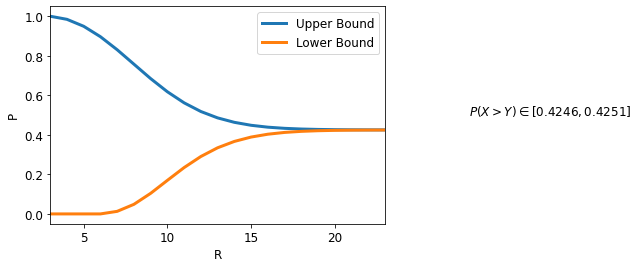

In [12]:
plt.figure()
plt.plot(R,upper,label='Upper Bound')
plt.plot(R,lower,label='Lower Bound')
plt.xlabel('R')
plt.ylabel('P')
plt.xticks(range(0,25,5))
plt.xlim(min(R),max(R))
plt.legend()
plt.text(R[-1]+5,0.5,'$P(X>Y)\in[{{{0:.4f}}},{{{1:.4f}}}]$'.format(lower[-1],upper[-1]))

In [13]:
# Infra
def appx_PX_gt_PY(X,Y):
    r = X.args[0]
    p = X.args[1]
    m = Y.args[0]//r
    #print('calculating for X~NB({},{}), Y~NB({},{}), r = {}, m = {}'.format(X.args[0],X.args[1],Y.args[0],Y.args[1],r,m))
    i = int(np.round(r/p*2))
    lower = sum(Y.pmf(y)*(1-X.cdf(y)) for y in range(r*m,i))
    upper = 1-sum(X.pmf(x)*(1-Y.cdf(x-1)) for x in range(r,i))
    return (lower+upper)/2

In [23]:
# calc values
m = 2
P = np.linspace(0.01,0.49,20)
R = range(1,21)
Xs = [nbinom(r,p,loc=r) for p in P for r in R]
Ys = [nbinom(m*r,m*p,loc=m*r) for p in P for r in R]
vals = np.array([appx_PX_gt_PY(X,Y) for X, Y in zip(Xs,Ys)])
vals = np.reshape(vals,(len(R),len(P)),order='F')

In [17]:
# # non pythonian way
# vals = np.empty((len(R),len(P)),dtype='float')
# for ir,r in enumerate(R):
#     for ip,p in enumerate(P):
#         X = nbinom(r,p,loc=r)
#         Y = nbinom(m*r,m*p,loc=m*r)
#         vals[ir,ip] = appx_PX_gt_PY(X,Y)

(20, 20)
(4, 4)


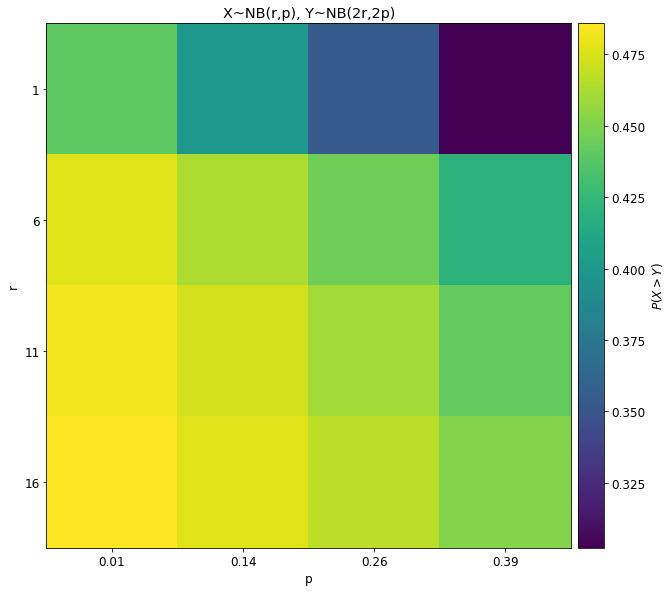

In [29]:
print(vals.shape)
vals_to_plot = vals[::5,::5]
print(vals_to_plot.shape)
plt.figure(figsize=(10,20))
ax = plt.gca()
im = ax.imshow(vals_to_plot)
plt.title('X~NB(r,p), Y~NB(2r,2p)')
plt.xlabel("p")
xticks = ['{:.2f}'.format(p) for p in P[::5]]
plt.xticks(range(len(xticks)),xticks)
plt.ylabel("r")
yticks = ['{}'.format(r) for r in R[::5]]
plt.yticks(range(len(yticks)),yticks)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

cbar = plt.colorbar(im, cax=cax)
cbar.set_label('$P(X>Y)$')

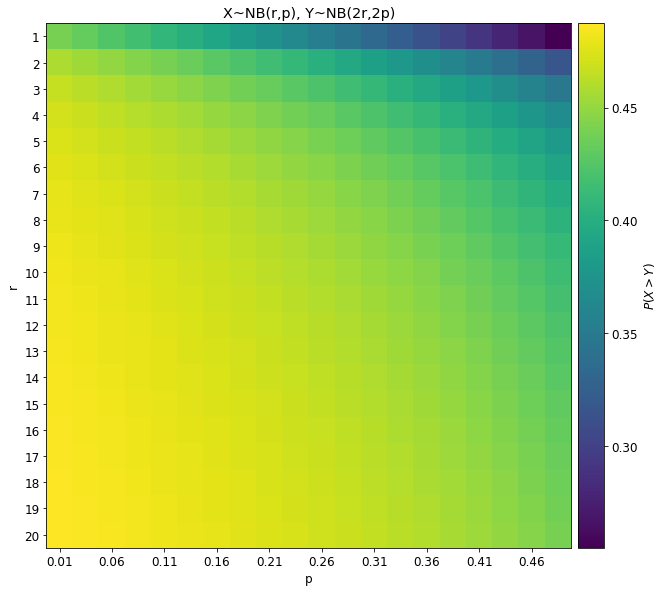

In [32]:
plt.figure(figsize=(10,20))
ax = plt.gca()
im = ax.imshow(vals)
plt.title('X~NB(r,p), Y~NB(2r,2p)')
plt.xlabel("p")
plt.xticks(range(0,vals.shape[0],2),['{:.2f}'.format(p) for i,p in enumerate(P) if not i%2])
plt.ylabel("r")
plt.yticks(range(vals.shape[1]),['{}'.format(r) for r in R])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

cbar = plt.colorbar(im, cax=cax)
cbar.set_label('$P(X>Y)$')